In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import re
import pprint 
import seaborn as sns
pp = pprint.PrettyPrinter(indent=2)

In [2]:
files = os.listdir("./")
files = [f for f in files if f[-3:] == "csv"]

In [3]:
setup_dic = {}

segmentation_type_regex = r"df_(.*)_uses"
uses_features_regex_expert = r"uses_user_features_(.*)"
get_expert_regex = r"expert_(\d)_"

for file in files:
    setup_dic[file] = {}
    setup_dic[file]["segmentation_type"] = re.findall(segmentation_type_regex, file)[0] + "_segmentation"
    setup_dic[file]["uses_user_features"] = re.findall(uses_features_regex_expert, file)[0].split("_")[0]
    if "whole" in file:
        setup_dic[file]["type_of_data"] = "whole"
    else:
        setup_dic[file]["type_of_data"] = "expert_" + re.findall(get_expert_regex, file)[0]


pp.pprint(setup_dic)

{ 'grid_search_df_coarse_uses_user_features_False_whole_data_15.12.2020-00:18:23.csv': { 'segmentation_type': 'coarse_segmentation',
                                                                                         'type_of_data': 'whole',
                                                                                         'uses_user_features': 'False'},
  'grid_search_df_coarse_uses_user_features_True_whole_data_15.12.2020-00:18:27.csv': { 'segmentation_type': 'coarse_segmentation',
                                                                                        'type_of_data': 'whole',
                                                                                        'uses_user_features': 'True'},
  'grid_search_df_fine_uses_user_features_False_whole_data_15.12.2020-00:18:47.csv': { 'segmentation_type': 'fine_segmentation',
                                                                                       'type_of_data': 'whole',
                           

In [4]:
for indx, file in enumerate(files):
    if indx == 0:
        complete_df = pd.read_csv(file)
        complete_df["segmentation_type"] = setup_dic[file]["segmentation_type"]
    else:
        df = pd.read_csv(file)
        df["segmentation_type"] = setup_dic[file]["segmentation_type"]
        complete_df = pd.concat([complete_df, df], ignore_index=True)
    print(len(complete_df))

complete_df.to_pickle("complete_gridsearch.pkl")
complete_df

48
96
144
192
240
288


,Unnamed: 0,model,criterion,optimizer,activation_function,hidden_layer_dims,batch_size,learning_rate,weight_decay,dropout,smote,avg_acc,avg_auc,use_user_data,split_by_expert,segmentation_type
0,0,binary,BCE,Adam,relu,[50],128,0.0005,0.0,0.5,True,0.615738,0.561039,False,whole_data,no_segmentation
1,1,binary,BCE,Adam,relu,[50],128,0.0005,0.0,0.5,False,0.706308,0.537843,False,whole_data,no_segmentation
2,2,binary,BCE,Adam,relu,[50],128,0.0005,0.2,0.5,True,0.643549,0.567363,False,whole_data,no_segmentation
3,3,binary,BCE,Adam,relu,[50],128,0.0005,0.2,0.5,False,0.667590,0.553851,False,whole_data,no_segmentation
4,4,binary,BCE,Adam,relu,[50],128,0.0005,0.5,0.5,True,0.630940,0.573074,False,whole_data,no_segmentation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,43,binary,BCE,Adam,relu,[1600],128,0.0001,0.0,0.5,False,0.696933,0.572259,True,whole_data,no_segmentation
284,44,binary,BCE,Adam,relu,[1600],128,0.0001,0.2,0.5,True,0.635316,0.573758,True,whole_data,no_segmentation
285,45,binary,BCE,Adam,relu,[1600],128,0.0001,0.2,0.5,False,0.645334,0.583966,True,whole_data,no_segmentation
286,46,binary,BCE,Adam,relu,[1600],128,0.0001,0.5,0.5,True,0.644239,0.579207,True,whole_data,no_segmentation


# Analysis

smote


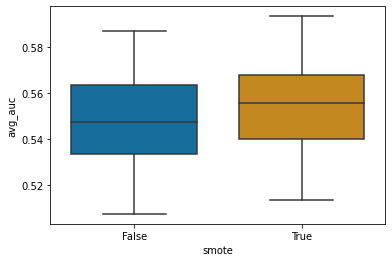

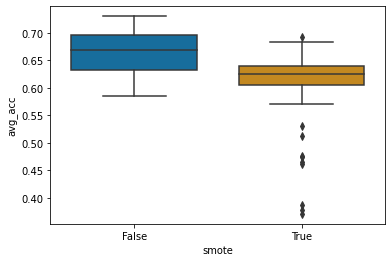

use_user_data


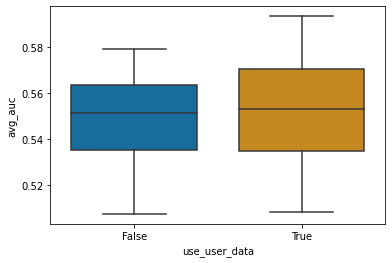

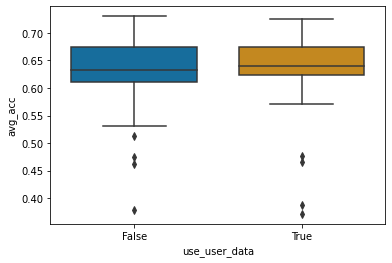

segmentation_type


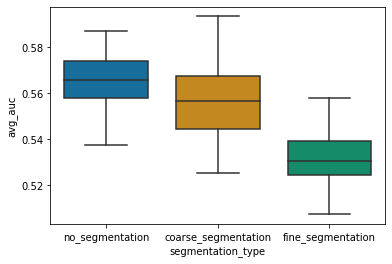

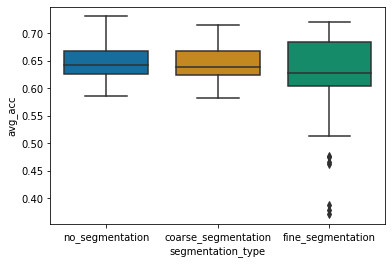

dropout


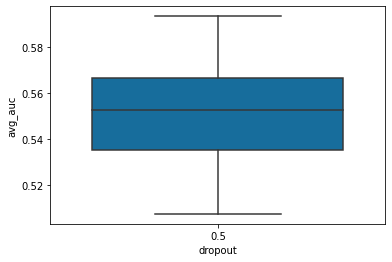

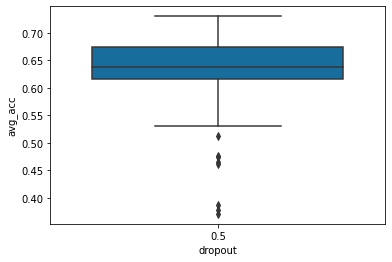

weight_decay


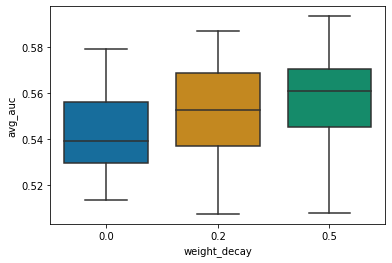

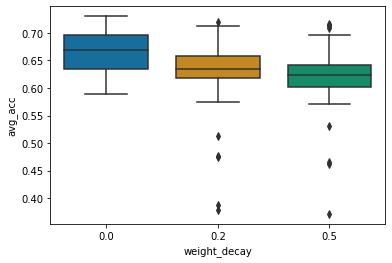

learning_rate


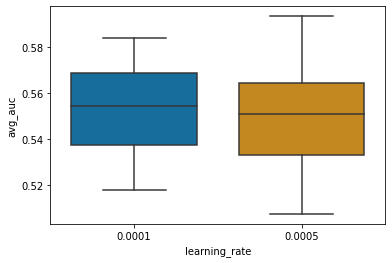

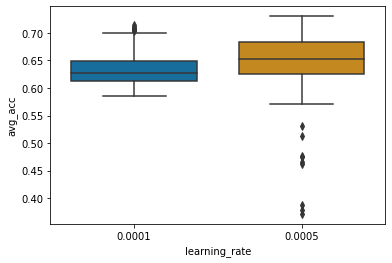

hidden_layer_dims


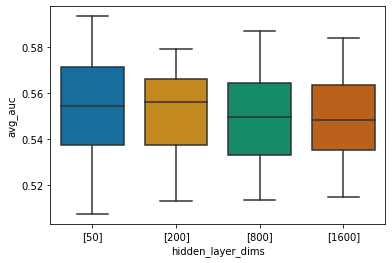

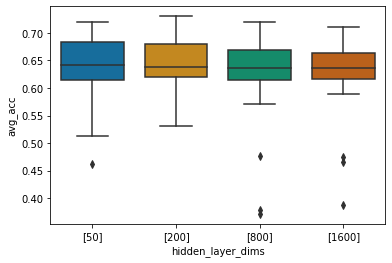

optimizer


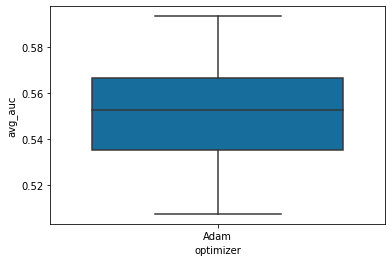

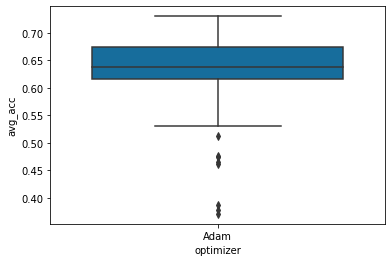

In [5]:
features_to_compare = ["smote", "use_user_data", "segmentation_type", "dropout", 
                       "weight_decay", "learning_rate", "hidden_layer_dims", "optimizer"]
#os.mkdir("figures")
for feature in features_to_compare:
    print(feature)
    bplot_auc = sns.boxplot(y='avg_auc', x=feature, 
                 data=complete_df, 
                 width=0.75,
                 palette="colorblind")
    bplot_auc.figure.savefig("figures/auc_compare_" + feature + "_.png",
                    format='png',
                    dpi=100)
    plt.show()
    bplot_acc = sns.boxplot(y='avg_acc', x=feature, 
             data=complete_df, 
             width=0.75,
             palette="colorblind")
    bplot_acc.figure.savefig("figures/acc_compare_" + feature + "_.png",
                    format='png',
                    dpi=100)
    plt.show()